# Hadoop MapReduce from Scractch

Présentation des résultats obtenus dans la version V3 du projet Hadoop MapReduce from scratch, implémenté pour le cours de Systèmes répartis (INF727 - Rémi Sharrock) à Télécom Paris.

Projet proposé par Rémi Sharrock : https://remisharrock.fr/courses/simple-hadoop-mapreduce-from-scratch/etape1/

Les résultats ci-dessous sont issus des tests sur le fichier disponible à cette adresse : https://commoncrawl.s3.amazonaws.com/crawl-data/CC-MAIN-2017-13/segments/1490218189495.77/wet/CC-MAIN-20170322212949-00140-ip-10-233-31-227.ec2.internal.warc.wet.gz.

__Librairies__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

__Résultats__

* MSR_time   : Temps de traitement pour les étapes MAP-SHUFFLE-REDUCE
* MSRSt_time : Temps de traitement pour les étapes MAP-SHUFFLE-REDUCE-Sort

In [2]:
file = pd.read_csv('results.txt', delimiter=';')
file.head()

,filename,split_size,nb_machines,MSR_time,MSRSt_time
0,CC-MAIN,16,38,23.35,55.07
1,CC-MAIN,16,35,22.74,54.62
2,CC-MAIN,16,30,23.06,55.44
3,CC-MAIN,16,25,22.65,54.33
4,CC-MAIN,16,21,22.45,53.39


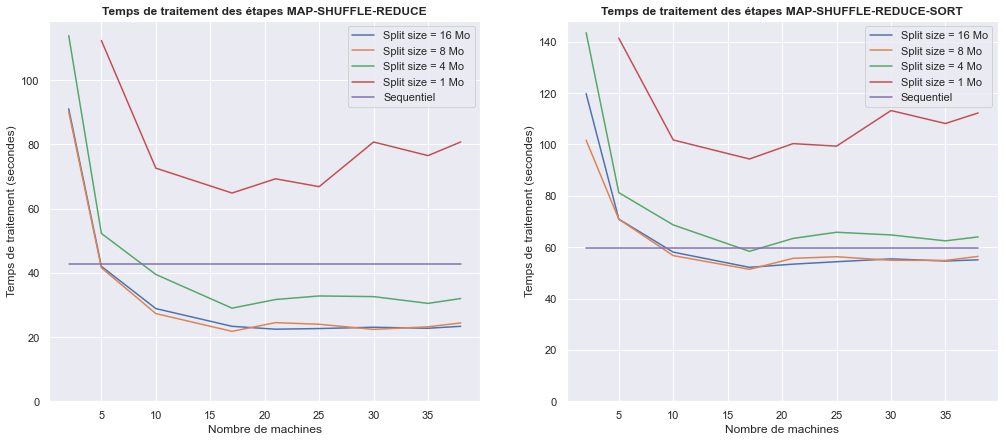

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

# MAP SHUFFLE REDUCE
for size in file['split_size'].unique():
    tmp = file[file['split_size'] == size]
    ax[0].plot(tmp['nb_machines'], tmp['MSR_time'], label=f'Split size = {size} Mo')
ax[0].set(xlabel = 'Nombre de machines',
       ylabel = 'Temps de traitement (secondes)')
ax[0].plot(file['nb_machines'].unique(), [42.694] * len(file['nb_machines'].unique()), label='Sequentiel')
ax[0].set_title('Temps de traitement des étapes MAP-SHUFFLE-REDUCE', fontweight="bold")
ax[0].set_ylim(ymin=0)
ax[0].legend()

# MAP SHUFFLE REDUCE SORT
for size in file['split_size'].unique():
    tmp = file[file['split_size'] == size]
    ax[1].plot(tmp['nb_machines'], tmp['MSRSt_time'], label=f'Split size = {size} Mo')
ax[1].set(xlabel = 'Nombre de machines',
       ylabel = 'Temps de traitement (secondes)')
ax[1].plot(file['nb_machines'].unique(), [59.496] * len(file['nb_machines'].unique()), label='Sequentiel')
ax[1].set_title('Temps de traitement des étapes MAP-SHUFFLE-REDUCE-SORT', fontweight="bold")
ax[1].set_ylim(ymin=0)
ax[1].legend()

plt.show()